# Mission 1: Cartesian product from dictionary to list of dictionaries.

*No imports - harder version*

In [1]:
input1 = {
    "szerokość": {"20cm", "16cm", "10cm"},
    "wysokość": {"30cm", "40cm"},
    "kolor": {"czarny", "biały", "zielony"}
}

def product_x(*args):
    # product('ABC', 'xy') --> Ax Ay Bx By Cx
    pools = [tuple(pool) for pool in args]
    result = [[]]
    for pool in pools:
        result = [x+[y] for x in result for y in pool]
    return result
    # # if tuple output is needed:
    # for prod in result:
    #     yield tuple(prod)


def dict_product(dicts):

    """
    Function cartesian product for dictionaries.
    Nested function `product_x` is an engine that create all computations necessary.
    `dict_product` is dedicated for dictionary case - as input.


    *dicts return keys
    *dicts.values() return values
    """
    return (dict(zip(dicts.keys(), val)) for val in product_x(*dicts.values()))

print(list(dict_product(input1)))

[{'szerokość': '16cm', 'wysokość': '40cm', 'kolor': 'zielony'}, {'szerokość': '16cm', 'wysokość': '40cm', 'kolor': 'biały'}, {'szerokość': '16cm', 'wysokość': '40cm', 'kolor': 'czarny'}, {'szerokość': '16cm', 'wysokość': '30cm', 'kolor': 'zielony'}, {'szerokość': '16cm', 'wysokość': '30cm', 'kolor': 'biały'}, {'szerokość': '16cm', 'wysokość': '30cm', 'kolor': 'czarny'}, {'szerokość': '20cm', 'wysokość': '40cm', 'kolor': 'zielony'}, {'szerokość': '20cm', 'wysokość': '40cm', 'kolor': 'biały'}, {'szerokość': '20cm', 'wysokość': '40cm', 'kolor': 'czarny'}, {'szerokość': '20cm', 'wysokość': '30cm', 'kolor': 'zielony'}, {'szerokość': '20cm', 'wysokość': '30cm', 'kolor': 'biały'}, {'szerokość': '20cm', 'wysokość': '30cm', 'kolor': 'czarny'}, {'szerokość': '10cm', 'wysokość': '40cm', 'kolor': 'zielony'}, {'szerokość': '10cm', 'wysokość': '40cm', 'kolor': 'biały'}, {'szerokość': '10cm', 'wysokość': '40cm', 'kolor': 'czarny'}, {'szerokość': '10cm', 'wysokość': '30cm', 'kolor': 'zielony'}, {'szer

# Mission 2: Faster methods for finding index than the `index` method.
*No imports - harder version*

In [2]:
def fastest_index_method(my_list, item):
    """
    returns index of x in ordered list.
    If x is between two items in the list, the index of the lower one is returned.
    """

    l = len(my_list)  # 5
    i = l // 2  # 2
    j = i // 2  # 1

    while (j > 0):
        if item < my_list[i]:
            i -= j
        else:
            i += j
        j = j // 2

    if item not in my_list:
        return None

    return i

-------------------
More deep and exciting answers for **mission 2** are below!

I will present a bunch of faster methods with `timeit` library (for speed tests). 
I will also use `matplotlib` for better visualisation of the output.

*Disclaimer: besides the fact that I import some stuff below, it doesn't have anything to do with finding a solution for the problem in a "harder way". **It's still the "without import" version**! Things imported are just for a better presentation of my point.

In [3]:
import random
import timeit
import pandas as pd

# The Jupyter magic %matplotlib inline allows plots to be displayed inline.
%matplotlib inline 
import matplotlib.pyplot as plt



"""
I will define a seed for random. 
With this approach 
I can test the time of execution with the seam result each time, 
because the list will have the same content every time.
"""
random.seed(2)

"""
I will create a few lists with 

list_a -> 100 numbers selected from the range 0 to 100 without duplicates.
list_b -> 1,000 numbers selected from the range 0 to 1,000 without duplicates.
list_c -> 10,000 numbers selected from the range 0 to 10,000 without duplicates.
list_d -> 100,000 numbers selected from the range 0 to 100,000 without duplicates.
list_e -> 1,000,000 numbers selected from the range 0 to 1,000,000 without duplicates.
list_f -> 10,000,000 numbers selected from the range 0 to 10,000,000 without duplicates.
list_g -> 100,000,000 numbers selected from the range 0 to 100,000,000 without duplicates.
"""
list_a = random.sample(range(101), 100)
list_b = random.sample(range(1001), 1000)
list_c = random.sample(range(10001), 10000)
list_d = random.sample(range(100001), 100000)
list_e = random.sample(range(1000001), 1000000)
list_f = random.sample(range(10000001), 10000000)
list_g = random.sample(range(100000001), 100000000)
# list_h = random.sample(range(1000000001), 1000000000) # `list_h` discarded (not enough memory)


list_all_index_method_time = []
final_data_output = {}

start = timeit.default_timer()
l_ind_a = list_a.index(1)
stop = timeit.default_timer()
# print('Time: index list with `index`: ', stop - start)
list_a_index_method_time = stop - start
list_all_index_method_time.append(list_a_index_method_time)

start = timeit.default_timer()
l_ind_b = list_b.index(1)
stop = timeit.default_timer()
# print('Time: index list with `index`: ', stop - start)
list_b_index_method_time = stop - start
list_all_index_method_time.append(list_b_index_method_time)

start = timeit.default_timer()
l_ind_c = list_c.index(1)
stop = timeit.default_timer()
# print('Time: index list with `index`: ', stop - start)
list_c_index_method_time = stop - start
list_all_index_method_time.append(list_c_index_method_time)

start = timeit.default_timer()
l_ind_d = list_d.index(1)
stop = timeit.default_timer()
# print('Time: index list with `index`: ', stop - start)
list_d_index_method_time = stop - start
list_all_index_method_time.append(list_d_index_method_time)

start = timeit.default_timer()
l_ind_e = list_e.index(1)
stop = timeit.default_timer()
# print('Time: index list with `index`: ', stop - start)
list_e_index_method_time = stop - start
list_all_index_method_time.append(list_e_index_method_time)

start = timeit.default_timer()
l_ind_f = list_f.index(1)
stop = timeit.default_timer()
# print('Time: index list with `index`: ', stop - start)
list_f_index_method_time = stop - start
list_all_index_method_time.append(list_f_index_method_time)

start = timeit.default_timer()
l_ind_g = list_g.index(1)
stop = timeit.default_timer()
# print('Time: index list with `index`: ', stop - start)
list_g_index_method_time = stop - start
list_all_index_method_time.append(list_g_index_method_time)

# start = timeit.default_timer() # `list_h` discarded (not enough memory)
# l_ind_h = list_h.index(1)
# stop = timeit.default_timer()
# # print('Time: index list with `index`: ', stop - start)
# list_h_index_method_time = stop - start
# list_all_index_method_time.append(list_h_index_method_time)

final_data_output["index_method"] = list_all_index_method_time

all_random_lists = [list_a, list_b, list_c, list_d, list_e, list_f, list_g] # `list_h` discarded (not enough memory)
 
# Sorted lists:
for i_list in all_random_lists:
    i_list = i_list.sort()

# print(list_a) # Test


list_all_find_func_time = []
list_all_find_index_finder_func_time = []
list_all_find_comprehension_list_time = []
list_all_find_list_with_loop_len_time = []
list_all_find_list_with_lambda_time = []
list_all_find_list_fastest_method_time = []

"""
List of method that will be tested:
"""


def find(my_list, item):
    if item not in my_list:
        print(None)
    for i in range(len(my_list)):
        if my_list[i] == item:
            yield i


def index_finder(my_list, item):
    """A generator function, if you might not need all the indices"""
    start = 0

    while True:
        try:
            start = my_list.index(item, start)
            yield start
            start += 1
        except ValueError:
            break
        except IndexError:
            return None


def index_of(my_list, item):
    item_e = enumerate(my_list)
    item_f = list(filter(lambda x: x[1] == item, item_e))
    if item not in my_list:
        return None
    elif item_f:
        return item_f[0][0]
    else:
        return -1


def enumerate_index(my_list, item):
    if item not in my_list:
        return None

    indices = [i for i, x in enumerate(my_list) if x == item]
    return indices[0]


def loop_index(my_list, item):
    count = 0
    indices = []

    if item not in my_list:
        return None

    for i in range(0, len(my_list)):
        if item == my_list[i]:
            indices.append(i)

    return indices[0]


def index_of(my_list, item):
    item_e = enumerate(my_list)
    item_f = list(filter(lambda x: x[1] == item, item_e))

    if item_f:
        return item_f[0][0]
    else:
        return -1


def fastest_index_method(my_list, item):
    """
    returns index of x in ordered list.
    If x is between two items in the list, the index of the lower one is returned.
    """

    l = len(my_list)  # 5
    i = l // 2  # 2
    j = i // 2  # 1

    while (j > 0):
        if item < my_list[i]:
            i -= j
        else:
            i += j
        j = j // 2

    if item not in my_list:
        return None

    return i


for name in all_random_lists:
    # loop related to `find()` method:
    start = timeit.default_timer()
    l_ind_find = list(find(name, 1))[0]
    stop = timeit.default_timer()
    # print('Time: index list with `find()` func: ', stop - start) # test
    list_find_func_method_time = stop - start
    list_all_find_func_time.append(list_find_func_method_time)

    # loop related to `index_finder()`method:
    start = timeit.default_timer()
    l_ind_i_find = list(index_finder(name, 1))[0]
    stop = timeit.default_timer()
    # print('Time: index list with `find()` func: ', stop - start) # test
    list_find_index_finder_func_time = stop - start
    list_all_find_index_finder_func_time.append(list_find_index_finder_func_time)

    # loop related to comprehension list method:
    start = timeit.default_timer()
    l_ind_enum = enumerate_index(name, 1)
    stop = timeit.default_timer()
    list_find_comprehension_list_time = stop - start
    list_all_find_comprehension_list_time.append(list_find_comprehension_list_time)

    # loop related to loop len method:
    start = timeit.default_timer()
    l_ind_loop_idx = loop_index(name, 1)
    stop = timeit.default_timer()
    list_find_list_with_loop_len_time = stop - start
    list_all_find_list_with_loop_len_time.append(list_find_list_with_loop_len_time)

    # loop related to index list with lambda method:
    start = timeit.default_timer()
    l_ind_mabda = index_of(name, 1)
    stop = timeit.default_timer()
    list_find_list_with_lambda_time = stop - start
    list_all_find_list_with_lambda_time.append(list_find_list_with_lambda_time)

    # loop related to the fastest method:
    start = timeit.default_timer()
    l_ind_fastest = fastest_index_method(name, 1)
    stop = timeit.default_timer()
    list_find_list_with_fastest_method_time = stop - start
    list_all_find_list_fastest_method_time.append(list_find_list_with_fastest_method_time)

final_data_output["find func method"] = list_all_find_func_time
final_data_output["find index finder"] = list_all_find_index_finder_func_time
final_data_output["find comprehension list"] = list_all_find_comprehension_list_time
final_data_output["find list with loop_len"] = list_all_find_list_with_loop_len_time
final_data_output["find list with lambda"] = list_all_find_list_with_lambda_time
final_data_output["find list with fastest method"] = list_all_find_list_fastest_method_time

df = pd.DataFrame(final_data_output)

"""Print an entire pandas DataFrame in Python:"""
pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(df)

# pd.DataFrame.plot(df)



In [4]:
df.head(8)

,index_method,find func method,find index finder,find comprehension list,find list with loop_len,find list with lambda,find list with fastest method
0,0.007570,0.000037,0.005295,0.000034,0.000008,0.001632,0.000003
1,0.000855,0.000069,0.000018,0.000048,0.000045,0.000133,0.000002
2,0.003595,0.004668,0.000282,0.000694,0.000491,0.001354,0.000004
3,0.017345,0.027224,0.001610,0.005766,0.004469,0.013641,0.000008
4,0.177962,0.236148,0.013787,0.051098,0.045573,0.145590,0.000012
5,2.129789,2.412187,0.131824,0.528414,0.517872,1.465841,0.000015
6,11.834068,8.872161,1.858980,5.959493,6.105738,15.700138,0.000070


I will create a plot chart for a better understanding of the output.

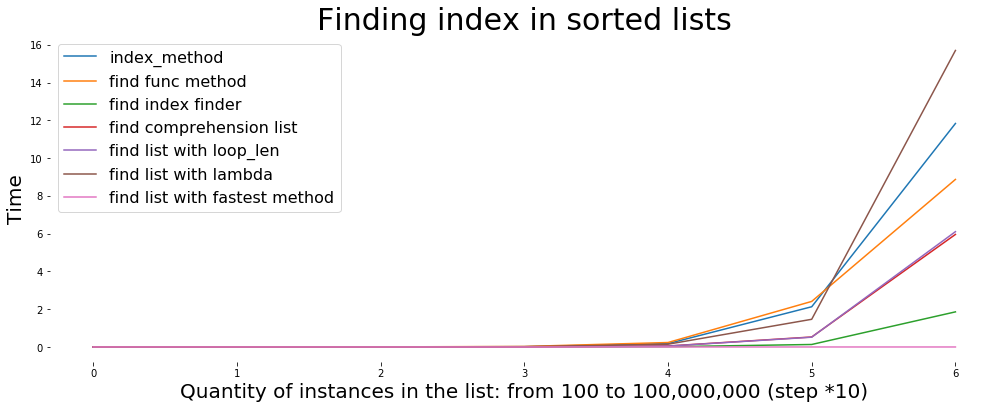

In [5]:
fig1, ax = plt.subplots(figsize=(17,6))
ax.set_axisbelow(True)
ax.plot(df)
    
ax.set_title(
    'Finding index in sorted lists',
    fontsize=30
)

ax.set_xlabel("Quantity of instances in the list: from 100 to 100,000,000 (step *10)", fontsize=20)
ax.set_ylabel("Time", fontsize=20)
ax.legend(df, loc='upper left', fontsize=16)


ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)

plt.show()

As we can see regular `index` method isn't the fastest. Function `fastest method` is significantly faster than others for sorted lists greater than **1,000,000** numbers. 

### Below unsorted list version for lists of the same range - I made it out of curiosity:

In [6]:
import random
import timeit
import pandas as pd

"""
I will define a seed for random. 
With this approach 
I can test the time of execution with the seam result each time, 
because the list will have the same content every time.
"""
random.seed(2)

"""
I will create a few lists with 

list_a -> 100 numbers selected from the range 0 to 100 without duplicates.
list_b -> 1,000 numbers selected from the range 0 to 1,000 without duplicates.
list_c -> 10,000 numbers selected from the range 0 to 10,000 without duplicates.
list_d -> 100,000 numbers selected from the range 0 to 100,000 without duplicates.
list_e -> 1,000,000 numbers selected from the range 0 to 1,000,000 without duplicates.
list_f -> 10,000,000 numbers selected from the range 0 to 10,000,000 without duplicates.
list_g -> 100,000,000 numbers selected from the range 0 to 100,000,000 without duplicates.
"""
list_a = random.sample(range(101), 100)
list_b = random.sample(range(1001), 1000)
list_c = random.sample(range(10001), 10000)
list_d = random.sample(range(100001), 100000)
list_e = random.sample(range(1000001), 1000000)
list_f = random.sample(range(10000001), 10000000)
list_g = random.sample(range(100000001), 100000000)



list_all_index_method_time = []
final_data_output = {}

start = timeit.default_timer()
l_ind_a = list_a.index(1)
stop = timeit.default_timer()
# print('Time: index list with `index`: ', stop - start)
list_a_index_method_time = stop - start
list_all_index_method_time.append(list_a_index_method_time)

start = timeit.default_timer()
l_ind_b = list_b.index(1)
stop = timeit.default_timer()
# print('Time: index list with `index`: ', stop - start)
list_b_index_method_time = stop - start
list_all_index_method_time.append(list_b_index_method_time)

start = timeit.default_timer()
l_ind_c = list_c.index(1)
stop = timeit.default_timer()
# print('Time: index list with `index`: ', stop - start)
list_c_index_method_time = stop - start
list_all_index_method_time.append(list_c_index_method_time)

start = timeit.default_timer()
l_ind_d = list_d.index(1)
stop = timeit.default_timer()
# print('Time: index list with `index`: ', stop - start)
list_d_index_method_time = stop - start
list_all_index_method_time.append(list_d_index_method_time)

start = timeit.default_timer()
l_ind_e = list_e.index(1)
stop = timeit.default_timer()
# print('Time: index list with `index`: ', stop - start)
list_e_index_method_time = stop - start
list_all_index_method_time.append(list_e_index_method_time)

start = timeit.default_timer()
l_ind_f = list_f.index(1)
stop = timeit.default_timer()
# print('Time: index list with `index`: ', stop - start)
list_f_index_method_time = stop - start
list_all_index_method_time.append(list_f_index_method_time)

start = timeit.default_timer()
l_ind_g = list_g.index(1)
stop = timeit.default_timer()
# print('Time: index list with `index`: ', stop - start)
list_g_index_method_time = stop - start
list_all_index_method_time.append(list_g_index_method_time)



final_data_output["index_method"] = list_all_index_method_time

all_random_lists = [list_a, list_b, list_c, list_d, list_e, list_f, list_g]

# # Sorted lists:
# for i_list in all_random_lists:
#     i_list = i_list.sort()

# print(list_a) # Test


list_all_find_func_time = []
list_all_find_index_finder_func_time = []
list_all_find_comprehension_list_time = []
list_all_find_list_with_loop_len_time = []
list_all_find_list_with_lambda_time = []
list_all_find_list_fastest_method_time = []

"""
List of method that will be tested:
"""


def find(my_list, item):
    if item not in my_list:
        print(None)
    for i in range(len(my_list)):
        if my_list[i] == item:
            yield i


def index_finder(my_list, item):
    """A generator function, if you might not need all the indices"""
    start = 0

    while True:
        try:
            start = my_list.index(item, start)
            yield start
            start += 1
        except ValueError:
            break
        except IndexError:
            return None


def index_of(my_list, item):
    item_e = enumerate(my_list)
    item_f = list(filter(lambda x: x[1] == item, item_e))
    if item not in my_list:
        return None
    elif item_f:
        return item_f[0][0]
    else:
        return -1


def enumerate_index(my_list, item):
    if item not in my_list:
        return None

    indices = [i for i, x in enumerate(my_list) if x == item]
    return indices[0]


def loop_index(my_list, item):
    count = 0
    indices = []

    if item not in my_list:
        return None

    for i in range(0, len(my_list)):
        if item == my_list[i]:
            indices.append(i)

    return indices[0]


def index_of(my_list, item):
    item_e = enumerate(my_list)
    item_f = list(filter(lambda x: x[1] == item, item_e))

    if item_f:
        return item_f[0][0]
    else:
        return -1


def fastest_index_method(my_list, item):
    """
    returns index of x in ordered list.
    If x is between two items in the list, the index of the lower one is returned.
    """

    l = len(my_list)  # 5
    i = l // 2  # 2
    j = i // 2  # 1

    while (j > 0):
        if item < my_list[i]:
            i -= j
        else:
            i += j
        j = j // 2

    if item not in my_list:
        return None

    return i


for name in all_random_lists:
    # loop related to `find()` method:
    start = timeit.default_timer()
    l_ind_find = list(find(name, 1))[0]
    stop = timeit.default_timer()
    # print('Time: index list with `find()` func: ', stop - start) # test
    list_find_func_method_time = stop - start
    list_all_find_func_time.append(list_find_func_method_time)

    # loop related to `index_finder()`method:
    start = timeit.default_timer()
    l_ind_i_find = list(index_finder(name, 1))[0]
    stop = timeit.default_timer()
    # print('Time: index list with `find()` func: ', stop - start) # test
    list_find_index_finder_func_time = stop - start
    list_all_find_index_finder_func_time.append(list_find_index_finder_func_time)

    # loop related to comprehension list method:
    start = timeit.default_timer()
    l_ind_enum = enumerate_index(name, 1)
    stop = timeit.default_timer()
    list_find_comprehension_list_time = stop - start
    list_all_find_comprehension_list_time.append(list_find_comprehension_list_time)

    # loop related to loop len method:
    start = timeit.default_timer()
    l_ind_loop_idx = loop_index(name, 1)
    stop = timeit.default_timer()
    list_find_list_with_loop_len_time = stop - start
    list_all_find_list_with_loop_len_time.append(list_find_list_with_loop_len_time)

    # loop related to index list with lambda method:
    start = timeit.default_timer()
    l_ind_mabda = index_of(name, 1)
    stop = timeit.default_timer()
    list_find_list_with_lambda_time = stop - start
    list_all_find_list_with_lambda_time.append(list_find_list_with_lambda_time)

    # loop related to the fastest method:
    start = timeit.default_timer()
    l_ind_fastest = fastest_index_method(name, 1)
    stop = timeit.default_timer()
    list_find_list_with_fastest_method_time = stop - start
    list_all_find_list_fastest_method_time.append(list_find_list_with_fastest_method_time)

final_data_output["find func method"] = list_all_find_func_time
final_data_output["find index finder"] = list_all_find_index_finder_func_time
final_data_output["find comprehension list"] = list_all_find_comprehension_list_time
final_data_output["find list with loop_len"] = list_all_find_list_with_loop_len_time
final_data_output["find list with lambda"] = list_all_find_list_with_lambda_time
final_data_output["find list with fastest method"] = list_all_find_list_fastest_method_time

df1 = pd.DataFrame(final_data_output)

"""Print an entire pandas DataFrame in Python:"""
pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(df1)

# pd.DataFrame.plot(df)



In [7]:
df1.head(8)

,index_method,find func method,find index finder,find comprehension list,find list with loop_len,find list with lambda,find list with fastest method
0,0.001727,0.002859,0.011507,0.008210,0.000013,0.008632,0.000009
1,0.001639,0.009482,0.000032,0.000053,0.000049,0.000135,0.000004
2,0.001446,0.002832,0.000159,0.000539,0.000634,0.001504,0.000028
3,0.012862,0.046618,0.003584,0.010530,0.008578,0.018972,0.001359
4,0.206311,0.238882,0.068929,0.195497,0.192376,0.238641,0.040830
5,2.846820,3.906451,0.870880,2.486465,2.425807,2.847916,0.639245
6,12.573327,46.796489,17.599046,33.779641,30.665033,37.697989,7.822796


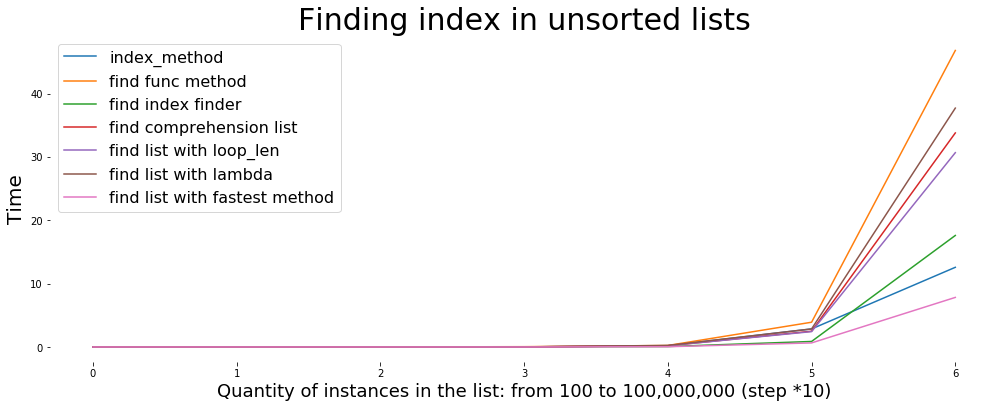

In [8]:
fig1, ax = plt.subplots(figsize=(17,6))
ax.set_axisbelow(True)
ax.plot(df1)
    
ax.set_title(
    'Finding index in unsorted lists',
    fontsize=30
)

ax.set_xlabel("Quantity of instances in the list: from 100 to 100,000,000 (step *10)", fontsize=18)
ax.set_ylabel("Time", fontsize=20)
ax.legend(df1, loc='upper left', fontsize=16)


ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)

plt.show()

For unsorted numbers, it takes more time to find a proper index. But here, also `fastest method` is the fastest. Significantly faster for unsorted list with **10,000,000** numbers. 